In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [84]:
fulldata = pd.read_csv("q1_2017_all.csv", sep=",")
fulldata

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
0,20170103,Stock,A,10.0,5.0,1.0,8.0,1007.029,26747.828,1146.0,11498.0,136.061,1143.090,153793.0,7666.0,2953.0,8566.0,111.009,741.996
1,20170103,Stock,AA,9.0,9.0,5.0,7.0,1231.781,29078.922,1524.0,13843.0,269.649,1498.692,148177.0,9374.0,3527.0,10656.0,124.118,1055.981
2,20170103,Stock,AAC,3.0,8.0,8.0,3.0,76.512,4017.455,432.0,1218.0,39.986,116.498,11758.0,535.0,295.0,926.0,10.992,82.820
3,20170103,Stock,AAL,10.0,9.0,4.0,8.0,3902.600,68480.684,3657.0,40826.0,436.702,4339.202,423057.0,37170.0,11078.0,40827.0,446.174,4339.302
4,20170103,Stock,AAMC,2.0,3.0,9.0,8.0,2.211,169.539,2.0,19.0,0.105,2.316,1198.0,11.0,4.0,11.0,0.096,1.791
5,20170103,Stock,AAME,2.0,1.0,9.0,2.0,0.949,69.485,3.0,8.0,0.300,1.249,265.0,5.0,1.0,8.0,0.075,1.249
6,20170103,Stock,AAN,8.0,8.0,4.0,7.0,473.313,14720.170,355.0,6483.0,37.030,510.343,89796.0,4893.0,2376.0,5112.0,77.653,363.667
7,20170103,Stock,AAOI,5.0,9.0,7.0,6.0,107.999,4413.842,239.0,1583.0,19.936,127.935,40075.0,1344.0,707.0,1583.0,25.074,127.935
8,20170103,Stock,AAON,7.0,3.0,5.0,7.0,85.253,2295.707,41.0,1153.0,2.828,87.981,17995.0,1113.0,516.0,1154.0,18.368,88.081
9,20170103,Stock,AAP,10.0,8.0,2.0,10.0,367.591,22608.724,1387.0,6569.0,108.330,475.921,98535.0,4061.0,2585.0,5142.0,87.687,360.097


## column names

In [13]:
list(fulldata)

['Date',
 'Security',
 'Ticker',
 'McapRank',
 'TurnRank',
 'VolatilityRank',
 'PriceRank',
 "LitVol('000)",
 "OrderVol('000)",
 'Hidden',
 'TradesForHidden',
 "HiddenVol('000)",
 "TradeVolForHidden('000)",
 'Cancels',
 'LitTrades',
 'OddLots',
 'TradesForOddLots',
 "OddLotVol('000)",
 "TradeVolForOddLots('000)"]

## datetime logic

In [14]:
print(fulldata['Date'][0])  # This is Jan. 3, 2017

20170103


In [149]:
fulldata['Date'] = pd.to_datetime(fulldata['Date'], format='%Y%m%d')

## categorical variables

In [112]:
fulldata['Security'] = fulldata['Security'].astype('category').cat.as_unordered()
fulldata['Ticker'] = fulldata['Ticker'].astype('category').cat.as_unordered()

In [58]:
print(fulldata['Security'].unique())
print(len(fulldata['Ticker'].unique()))

[Stock, ETF]
Categories (2, object): [Stock, ETF]
5338


In [60]:
fulldata.groupby('Security').count()

,Date,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
Security,,,,,,,,,,,,,,,,,,
ETF,100046,100046,100043,100043,100046,100043,100046,100046,100046,100046,100046,100046,100046,100046,100046,100046,100046,100046
Stock,225116,225116,225040,225040,225115,225040,225116,225116,225116,225116,225116,225116,225116,225116,225116,225116,225116,225116


## basic commands

In [61]:
len(fulldata['Date'].unique())

62

In [69]:
fulldata.groupby('Ticker')['Date'].count().value_counts().sort_index()

1        4
2        3
3        9
4        3
5        4
6        3
7        2
8        5
9        3
10       3
11       5
12       2
13       2
14       4
15       5
16       2
17       2
20       4
21       1
22       3
23       2
24       5
25       2
26       1
27       2
28       4
29       1
32       4
33       5
34       4
35       6
37       5
38       4
39       2
40       3
41       1
42       4
43       1
44       2
45       5
46       3
47       6
48       5
50       1
51       3
52       1
53       1
54       3
55      13
56       2
57       6
58       2
59       1
60       6
61       4
62    5147
63       1
64       1
Name: Date, dtype: int64

In [72]:
fulldata.groupby('Ticker')['Date'].count().idxmax()

'TPYP'

In [88]:
fulldata[fulldata.duplicated(subset=('Date','Ticker'), keep='first')]

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
72689,2017-01-23,ETF,JUNE,1.0,4.0,4.0,2.0,3.09,22038.008,6.0,12.0,1.00,4.09,26860.0,6.0,2.0,12.0,0.154,4.09
283007,2017-03-21,ETF,TPYP,2.0,2.0,3.0,1.0,15.05,27806.710,24.0,56.0,3.25,18.30,13836.0,32.0,2.0,56.0,0.050,18.30
309222,2017-03-28,ETF,TPYP,2.0,2.0,2.0,1.0,11.55,12542.754,4.0,28.0,0.60,12.15,7102.0,24.0,0.0,28.0,0.000,12.15


## remove duplicates

In [89]:
fulldata = fulldata.drop_duplicates(subset=('Date','Ticker'), keep='first')

## another groupby

In [95]:
fulldata.groupby(by=['VolatilityRank', 'Security', 'Date'])['Security'].count()

VolatilityRank  Security  Date      
1.0             ETF       2017-01-03    403
                          2017-01-04    403
                          2017-01-05    404
                          2017-01-06    402
                          2017-01-09    402
                          2017-01-10    402
                          2017-01-11    402
                          2017-01-12    403
                          2017-01-13    403
                          2017-01-17    403
                          2017-01-18    403
                          2017-01-19    403
                          2017-01-20    403
                          2017-01-23    404
                          2017-01-24    403
                          2017-01-25    403
                          2017-01-26    403
                          2017-01-27    403
                          2017-01-30    403
                          2017-01-31    403
                          2017-02-01    403
                          2017-02-02   

## recast as categorical variables

In [111]:
fulldata = fulldata.copy()
fulldata['McapRank'] = fulldata['McapRank'].astype('category').cat.as_ordered()
fulldata['TurnRank'] = fulldata['TurnRank'].astype('category').cat.as_ordered()
fulldata['VolatilityRank'] = fulldata['VolatilityRank'].astype('category').cat.as_ordered()
fulldata['PriceRank'] = fulldata['PriceRank'].astype('category').cat.as_ordered()

## data summary

In [113]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325159 entries, 0 to 325161
Data columns (total 19 columns):
Date                        325159 non-null datetime64[ns]
Security                    325159 non-null category
Ticker                      325159 non-null category
McapRank                    325080 non-null category
TurnRank                    325080 non-null category
VolatilityRank              325158 non-null category
PriceRank                   325080 non-null category
LitVol('000)                325159 non-null float64
OrderVol('000)              325159 non-null float64
Hidden                      325159 non-null float64
TradesForHidden             325159 non-null float64
HiddenVol('000)             325159 non-null float64
TradeVolForHidden('000)     325159 non-null float64
Cancels                     325159 non-null float64
LitTrades                   325159 non-null float64
OddLots                     325159 non-null float64
TradesForOddLots            325159 non-null 

In [114]:
fulldata.describe()

,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
count,325159.000000,3.251590e+05,325159.000000,325159.000000,325159.000000,325159.000000,3.251590e+05,325159.000000,325159.000000,325159.000000,325159.000000,325159.000000
mean,431.764045,3.574691e+04,454.364775,3475.798991,66.907770,498.040846,7.357938e+04,2708.215399,916.053728,3114.817825,32.492184,422.776768
std,1740.908441,1.574917e+05,1203.344021,8923.091486,244.623292,1958.484971,1.968162e+05,7320.665749,1960.216622,8277.276242,71.497648,1753.085228
min,0.000000,0.000000e+00,-143.000000,0.000000,-7903.643000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.459000,8.845240e+02,10.000000,41.000000,1.150000,5.636000,3.126000e+03,23.000000,8.000000,39.000000,0.280000,5.314000
50%,44.573000,4.002995e+03,75.000000,501.000000,8.740000,55.306000,1.558300e+04,377.000000,154.000000,464.000000,5.254000,49.944000
75%,254.405500,1.558087e+04,370.000000,2846.000000,44.015500,301.585000,6.011250e+04,2186.500000,887.000000,2558.000000,31.083000,260.177000
max,119014.064000,7.293901e+06,89335.000000,533874.000000,14821.940000,133714.593000,7.607714e+06,383222.000000,130106.000000,462414.000000,3728.885000,108034.795000


## boxplot

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


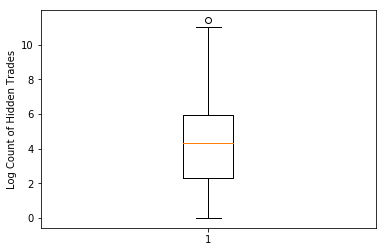

In [130]:
fig, axs = plt.subplots(1, 1)
axs.boxplot(np.log(fulldata['Hidden']).dropna())
axs.set_ylabel("Log Count of Hidden Trades")
plt.show()

## idxmax

In [144]:
fulldata.iloc[:, 7:19].apply(lambda x: x.idxmax())

LitVol('000)                278303
OrderVol('000)              298903
Hidden                      212803
TradesForHidden             212803
HiddenVol('000)             278303
TradeVolForHidden('000)     278303
Cancels                     282946
LitTrades                   212803
OddLots                     212803
TradesForOddLots            212803
OddLotVol('000)             212803
TradeVolForOddLots('000)    283173
dtype: int64

## missing data

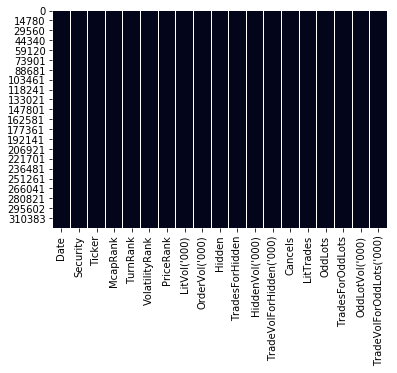

In [148]:
sns.heatmap(fulldata.isnull(), cbar=False)

In [145]:
fulldata[fulldata.isnull().any(axis=1)]

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
21303,2017-01-09,Stock,AXAR,NaN,NaN,1.0,NaN,0.000,21.500,0.0,0.0,0.000,0.000,85.0,0.0,0.0,0.0,0.000,0.000
48530,2017-01-17,Stock,FTI,NaN,NaN,4.0,NaN,11267.122,176892.554,10120.0,75314.0,2314.994,13504.012,617632.0,54296.0,12235.0,63096.0,471.916,8368.972
59699,2017-01-19,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000
65651,2017-01-20,Stock,RDIB,NaN,NaN,1.0,NaN,0.000,1.223,0.0,0.0,0.000,0.000,5.0,0.0,0.0,0.0,0.000,0.000
70184,2017-01-23,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000
72688,2017-01-23,ETF,JUNE,NaN,NaN,4.0,NaN,3.090,22038.008,6.0,12.0,1.000,4.090,26860.0,6.0,2.0,12.0,0.154,4.090
76134,2017-01-24,Stock,RDIB,NaN,NaN,1.0,NaN,0.000,0.210,0.0,0.0,0.000,0.000,1.0,0.0,0.0,0.0,0.000,0.000
80664,2017-01-25,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.275,0.0,0.0,0.000,0.000,4.0,0.0,0.0,0.0,0.000,0.000
91150,2017-01-27,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000
96396,2017-01-30,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.400,0.0,0.0,0.000,0.000,3.0,0.0,0.0,0.0,0.000,0.000
